In [56]:
import numpy
import matplotlib
from PIL import Image
import os, sys
from PIL import ImageFilter
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt 
import sys as sys
import cv2
from scipy.signal import find_peaks
import imageio

In [80]:
def histogram_Equilization(image):
    #read image, plot image and plot it's histogram
    hist = imageio.imread(image)
    plt.imshow(hist, cmap = matplotlib.cm.Greys_r) 
    plt.title("original image")
    plt.show()
    plt.hist(hist.ravel(),256,[0,256]);
    plt.title("histogram of the original image")
    plt.show()
    #count and plot the intensity distribution
    intensity = [0 for x in range(256)]
    for r in range(len(hist)): 
            for c in range(len(hist[r])):
                intensity[hist[r][c]]+=1
    intensity = np.array(intensity)
    plt.plot(intensity)
    plt.title("intensity distribution of the original image")
    plt.show()
    #convert intensity into probabilities
    intensity = intensity/250000
    #plot the probabilities
    plt.plot(intensity)
    plt.title("intensity probabilities of the original image")
    plt.show()
    #calculate the cummulatiove sum of probabilities
    intensity = np.cumsum(intensity)
    #plot the cum sum
    plt.plot(intensity)
    plt.title("cummulative sum of intensity probs of the original image")
    plt.show()
    #transform cumsum to grey values
    intensity = intensity*255
    #plot the map
    plt.plot(intensity)
    plt.title("transformed cumsum distribution to the dynamic range of the original image")
    plt.show()
    #apply the map
    container = np.zeros((hist.shape[0],hist.shape[1]))
    for r in range(len(hist)): 
        for c in range(len(hist[r])):
            container[r][c] = intensity[hist[r][c]]
    return container

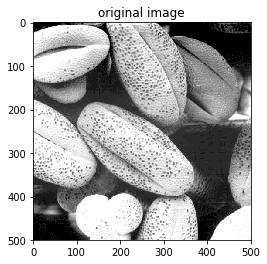

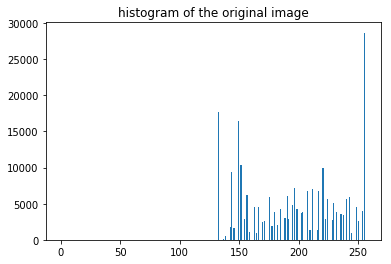

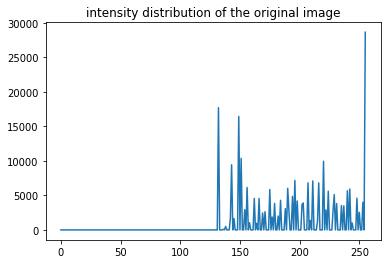

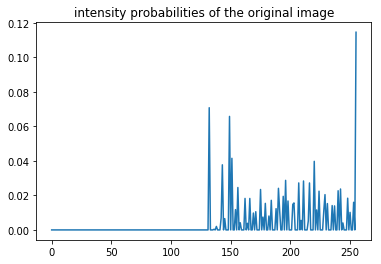

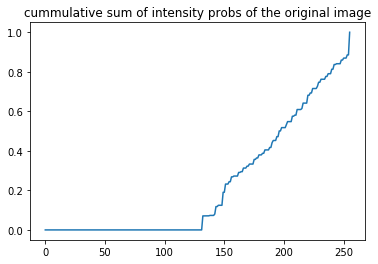

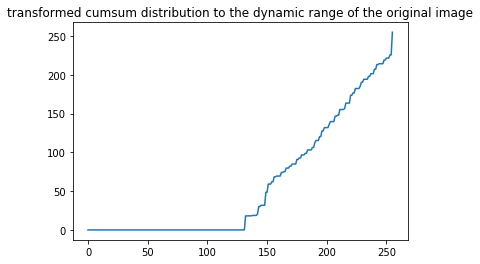

In [81]:
container = histogram_Equilization("hist2.tif")

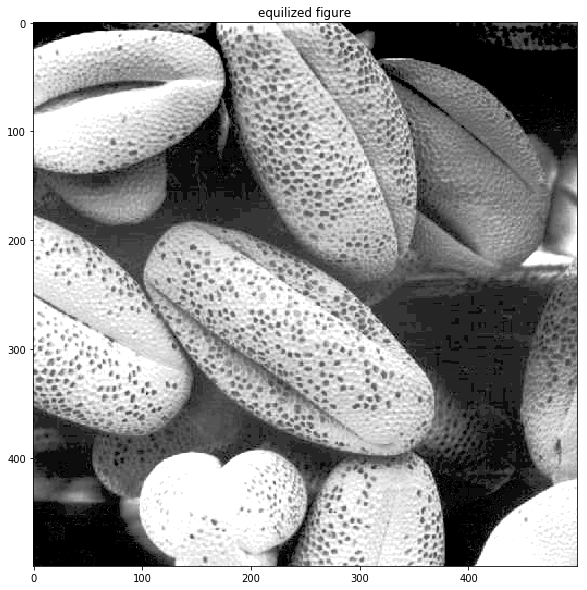

In [82]:
#plot the equilized figure
plt.figure(figsize=(10,10))
plt.imshow(container, cmap = matplotlib.cm.Greys_r) 
plt.title("equilized figure")
plt.show()

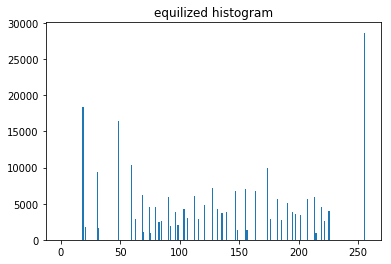

In [85]:
plt.hist(container.ravel(),256,[0,256]);
plt.title("equilized histogram")
plt.show()